### 지금까지 수집하고 전처리한 기온, 강수량, 교통, 소비, 코로나 데이터를 이용하여 상관 분석 및 회귀 분석 진행

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rawData_weather = pd.read_csv('weather강원.csv', encoding='CP949', engine='python')
rawData_tollgate = pd.read_csv('강원_교통량.csv', encoding='CP949', engine='python')
rawData_consume = pd.read_csv('매출_강원.csv', encoding='CP949', engine='python')

In [173]:
rawData_weather

,date,city,mean,minimum,maximum,rain,province
0,2020-01-20,Gangneung,3.7,1.1,7.5,0.0,Gangwon-do
1,2020-01-20,Daegwallyeong,-3.7,-6.1,-0.7,0.0,Gangwon-do
2,2020-01-20,Donghae,3.7,0.0,6.9,0.0,Gangwon-do
3,2020-01-20,Northgangneung,2.2,-2.4,6.4,0.0,Gangwon-do
4,2020-01-20,Northchuncheon,-0.9,-7.1,5.1,0.0,Gangwon-do
...,...,...,...,...,...,...,...
5676,2021-03-31,Jeongseon,10.8,0.2,22.8,0.0,Gangwon-do
5677,2021-03-31,Cheorwon,11.0,0.2,21.7,0.0,Gangwon-do
5678,2021-03-31,Chuncheon,12.7,2.2,23.5,0.0,Gangwon-do
5679,2021-03-31,Taebaek,8.5,-0.2,18.5,0.0,Gangwon-do


In [174]:
rawData_tollgate

,date,tollgate,code,1jong,2jong,3jong,6jong,"1,2,3,6jong",total,city,province
0,20200101,강릉,189,14968,141,558,401,16068,16159,Gangneung,Gangwon-do
1,20200101,근덕,704,4367,26,150,111,4654,4717,Samcheok,Gangwon-do
2,20200101,남강릉,584,5301,30,138,130,5599,5631,Gangneung,Gangwon-do
3,20200101,남양양,284,6008,23,60,120,6211,6215,Yangyang,Gangwon-do
4,20200101,남원주,218,9745,102,269,285,10401,10466,Wonju,Gangwon-do
...,...,...,...,...,...,...,...,...,...,...,...
11915,20210331,진부,187,1553,74,90,45,1762,1862,Pyeongchang,Gangwon-do
11916,20210331,춘천,174,13095,389,432,602,14518,15123,Chuncheon,Gangwon-do
11917,20210331,평창,185,1468,64,107,34,1673,1869,Pyeongchang,Gangwon-do
11918,20210331,하조대,585,1794,56,79,59,1988,2094,Yangyang,Gangwon-do


In [175]:
rawData_consume.drop(columns=['Unnamed: 0'], inplace=True)

In [176]:
rawData_consume

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
0,20190101,Gangwon-do,2118913513,363350848,124374450,55426200,132477810,1439118605
1,20190102,Gangwon-do,749735647,133344805,66260240,34309310,77429460,438027832
2,20190103,Gangwon-do,687116814,122709604,50308700,31476300,65833460,416542450
3,20190104,Gangwon-do,812609757,126291275,63451130,40883020,81319820,500454512
4,20190105,Gangwon-do,1941231621,293520888,153755530,81896680,200587065,1208503458
...,...,...,...,...,...,...,...,...
925,20210714,Gangwon-do,997945003,80586155,273339487,4922300,36005410,602452951
926,20210715,Gangwon-do,1013221509,83172136,231063450,3501750,64354120,630111453
927,20210716,Gangwon-do,1142390489,58556965,191620430,2965050,66009012,821262032
928,20210717,Gangwon-do,1982830338,121893502,263424160,9595000,126941220,1458591956


In [177]:
rawData_weather = rawData_weather[rawData_weather['date'] != '2020-10-01']
# rawData_consume[rawData_consume['date'] != '20201001']

## 날짜를 기준으로  groupby (톨게이트는 sum, 날씨는 mean)

In [178]:
Data_tollgate = rawData_tollgate.groupby(by=['date']).sum()

Data_tollgate

,code,1jong,2jong,3jong,6jong,"1,2,3,6jong",total
date,,,,,,,
20200101,10902,164761,1274,4135,4563,174733,175646
20200102,10902,101563,2442,4289,3729,112023,115851
20200103,10902,105515,2774,4770,4027,117086,121907
20200104,10902,125852,1755,4272,3795,135674,138699
20200105,10902,125734,871,3824,3773,134202,135104
...,...,...,...,...,...,...,...
20210327,11085,110087,1945,2724,3425,118181,122361
20210328,11085,108119,925,1900,3224,114168,115306
20210329,11085,89921,3004,3734,3706,100365,106932


In [179]:
Data_weather = rawData_weather.groupby(by=['date']).mean()

Data_weather

,mean,minimum,maximum,rain
date,,,,
2020-01-20,0.400000,-3.538462,4.715385,0.000000
2020-01-21,-1.276923,-7.407692,5.246154,0.000000
2020-01-22,1.938462,-1.230769,6.684615,0.003846
2020-01-23,3.253846,-1.776923,11.000000,0.003846
2020-01-24,1.638462,-3.053846,7.538462,2.788462
...,...,...,...,...
2021-03-27,9.938462,5.815385,14.869231,13.992308
2021-03-28,10.800000,8.576923,14.015385,5.746154
2021-03-29,11.400000,7.076923,15.946154,0.161538


## index reset하기

In [180]:
Data_weather = Data_weather.reset_index()
Data_tollgate = Data_tollgate.reset_index()

In [181]:
Data_tollgate

,date,code,1jong,2jong,3jong,6jong,"1,2,3,6jong",total
0,20200101,10902,164761,1274,4135,4563,174733,175646
1,20200102,10902,101563,2442,4289,3729,112023,115851
2,20200103,10902,105515,2774,4770,4027,117086,121907
3,20200104,10902,125852,1755,4272,3795,135674,138699
4,20200105,10902,125734,871,3824,3773,134202,135104
...,...,...,...,...,...,...,...,...
450,20210327,11085,110087,1945,2724,3425,118181,122361
451,20210328,11085,108119,925,1900,3224,114168,115306
452,20210329,11085,89921,3004,3734,3706,100365,106932
453,20210330,11085,85679,3302,3917,3563,96461,103694


## 톨게이트 데이터 2020.01.20부터로 자르기

In [182]:
Data_tollgate = Data_tollgate[19:]

In [183]:
Data_tollgate = Data_tollgate.reset_index()

Data_tollgate.drop(columns=['index'], inplace=True)

Data_tollgate

,date,code,1jong,2jong,3jong,6jong,"1,2,3,6jong",total
0,20200120,10902,91003,2707,4502,3769,101981,106811
1,20200121,10902,86801,2861,4874,3567,98103,103341
2,20200122,10902,88430,2794,4830,3726,99780,104789
3,20200123,10902,101134,2380,4268,4199,111981,115125
4,20200124,10902,123715,999,3049,3766,131529,132330
...,...,...,...,...,...,...,...,...
431,20210327,11085,110087,1945,2724,3425,118181,122361
432,20210328,11085,108119,925,1900,3224,114168,115306
433,20210329,11085,89921,3004,3734,3706,100365,106932
434,20210330,11085,85679,3302,3917,3563,96461,103694


## 매출 데이터 2020.01.20부터로 자르기

In [184]:
rawData_consume[rawData_consume['date'] == 20200120]

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
384,20200120,Gangwon-do,743778506,151064838,54921620,33077850,70212594,427904074


In [185]:
rawData_consume[rawData_consume['date'] == 20210331]

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
820,20210331,Gangwon-do,640544849,18017531,173145780,1218350,42381333,405478355


In [186]:
Data_consume = rawData_consume[384:821]

In [187]:
Data_consume

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
384,20200120,Gangwon-do,743778506,151064838,54921620,33077850,70212594,427904074
385,20200121,Gangwon-do,691522353,108155712,73071460,28079650,65322280,416503351
386,20200122,Gangwon-do,610782929,68703123,67379200,21546400,67253341,385696365
387,20200123,Gangwon-do,836368965,104740275,68191300,28343000,132011445,502309945
388,20200124,Gangwon-do,1830318381,273236639,136695575,51179950,278849260,1081048607
...,...,...,...,...,...,...,...,...
816,20210327,Gangwon-do,1388755628,114759907,190643030,5546630,140007697,936209864
817,20210328,Gangwon-do,955619576,72347770,168775170,3986990,63742393,646663253
818,20210329,Gangwon-do,586164485,20771860,159504900,1167690,41997870,362722165
819,20210330,Gangwon-do,606361586,14337160,168886510,899100,43506040,378311476


In [188]:
Data_consume = Data_consume[rawData_consume['date'] != 20201001]

Data_consume

<ipython-input-188-beabea63f8a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_consume = Data_consume[rawData_consume['date'] != 20201001]


,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
384,20200120,Gangwon-do,743778506,151064838,54921620,33077850,70212594,427904074
385,20200121,Gangwon-do,691522353,108155712,73071460,28079650,65322280,416503351
386,20200122,Gangwon-do,610782929,68703123,67379200,21546400,67253341,385696365
387,20200123,Gangwon-do,836368965,104740275,68191300,28343000,132011445,502309945
388,20200124,Gangwon-do,1830318381,273236639,136695575,51179950,278849260,1081048607
...,...,...,...,...,...,...,...,...
816,20210327,Gangwon-do,1388755628,114759907,190643030,5546630,140007697,936209864
817,20210328,Gangwon-do,955619576,72347770,168775170,3986990,63742393,646663253
818,20210329,Gangwon-do,586164485,20771860,159504900,1167690,41997870,362722165
819,20210330,Gangwon-do,606361586,14337160,168886510,899100,43506040,378311476


In [189]:
Data_consume = Data_consume.reset_index()

Data_consume.drop(columns=['index'], inplace=True)

Data_consume

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
0,20200120,Gangwon-do,743778506,151064838,54921620,33077850,70212594,427904074
1,20200121,Gangwon-do,691522353,108155712,73071460,28079650,65322280,416503351
2,20200122,Gangwon-do,610782929,68703123,67379200,21546400,67253341,385696365
3,20200123,Gangwon-do,836368965,104740275,68191300,28343000,132011445,502309945
4,20200124,Gangwon-do,1830318381,273236639,136695575,51179950,278849260,1081048607
...,...,...,...,...,...,...,...,...
431,20210327,Gangwon-do,1388755628,114759907,190643030,5546630,140007697,936209864
432,20210328,Gangwon-do,955619576,72347770,168775170,3986990,63742393,646663253
433,20210329,Gangwon-do,586164485,20771860,159504900,1167690,41997870,362722165
434,20210330,Gangwon-do,606361586,14337160,168886510,899100,43506040,378311476


In [190]:
Data_weather

,date,mean,minimum,maximum,rain
0,2020-01-20,0.400000,-3.538462,4.715385,0.000000
1,2020-01-21,-1.276923,-7.407692,5.246154,0.000000
2,2020-01-22,1.938462,-1.230769,6.684615,0.003846
3,2020-01-23,3.253846,-1.776923,11.000000,0.003846
4,2020-01-24,1.638462,-3.053846,7.538462,2.788462
...,...,...,...,...,...
431,2021-03-27,9.938462,5.815385,14.869231,13.992308
432,2021-03-28,10.800000,8.576923,14.015385,5.746154
433,2021-03-29,11.400000,7.076923,15.946154,0.161538
434,2021-03-30,9.915385,2.246154,18.176923,0.000000


## 상관계수 분석

#### 기온 vs. 교통량

In [191]:
# 상관계수 분석 (mean temp vs. traffic) _numpy 
corr_weather = np.corrcoef(Data_weather['mean'], Data_tollgate['1,2,3,6jong'])
print(corr_weather)

[[1.         0.49162716]
 [0.49162716 1.        ]]


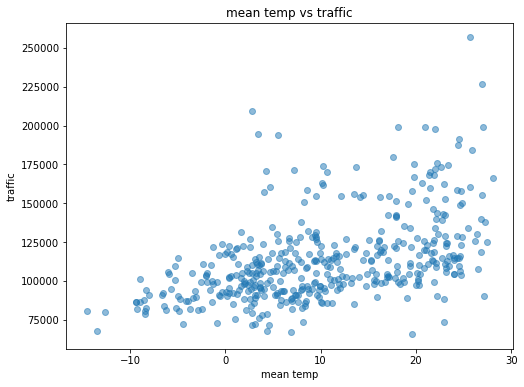

In [197]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_weather['mean'], Data_tollgate['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('mean temp vs traffic') 
plt.xlabel('mean temp') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

#### 매출 vs. 교통량

In [200]:
# 상관계수 분석 (consumption vs. traffic) _numpy 
corr_consume = np.corrcoef(Data_consume['총소비'], Data_tollgate['1,2,3,6jong'])
print(corr_consume)

[[1.         0.88919316]
 [0.88919316 1.        ]]


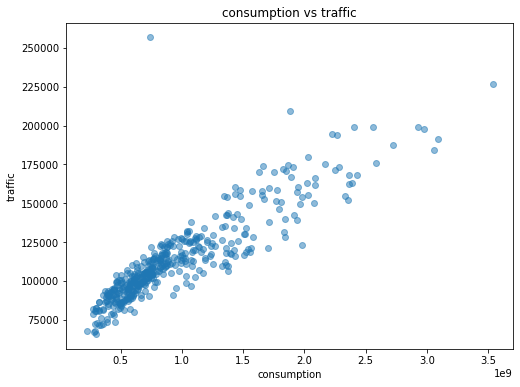

In [201]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_consume['총소비'], Data_tollgate['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('consumption vs traffic') 
plt.xlabel('consumption') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

#### 강수량 vs. 교통량

In [237]:
# 상관계수 분석 (rain vs. traffic) _numpy 
corr_rain = np.corrcoef(Data_weather['rain'], Data_tollgate['1,2,3,6jong'])
print(corr_rain)

[[ 1.         -0.00565767]
 [-0.00565767  1.        ]]


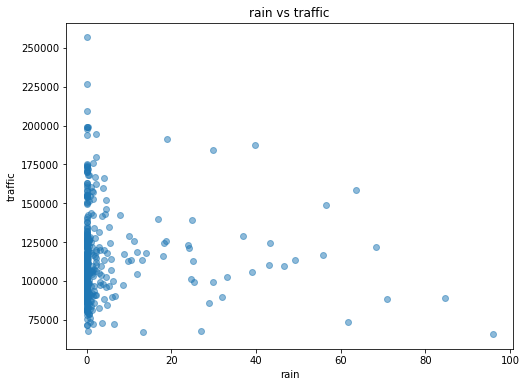

In [238]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_weather['rain'], Data_tollgate['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('rain vs traffic') 
plt.xlabel('rain') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

In [204]:
# Data_consume['총소비']
# Data_tollgate['1,2,3,6jong']

0       743778506
1       691522353
2       610782929
3       836368965
4      1830318381
          ...    
431    1388755628
432     955619576
433     586164485
434     606361586
435     640544849
Name: 총소비, Length: 436, dtype: int64

## 2,3분기 데이터 모으기

In [211]:
Data_consume[Data_consume['date'] == 20200401]

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
72,20200401,Gangwon-do,492641289,16547680,127286630,205000,30158560,318443419


In [214]:
Data_consume[Data_consume['date'] == 20200930]

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
254,20200930,Gangwon-do,1523256942,140194899,237382450,9059590,226278550,907419853


In [215]:
Data_consume2 = Data_consume[72:255]

Data_consume2 = Data_consume2.reset_index()
Data_consume2.drop(columns=['index'], inplace=True)

Data_consume2

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
0,20200401,Gangwon-do,492641289,16547680,127286630,205000,30158560,318443419
1,20200402,Gangwon-do,558616071,15886638,145841184,397400,41388900,354828899
2,20200403,Gangwon-do,687814899,29374600,145738990,256700,48716788,463654421
3,20200404,Gangwon-do,1359897454,87198710,161165880,1042600,125623800,983808714
4,20200405,Gangwon-do,1031993825,50757099,174252120,1076300,77242490,727876566
...,...,...,...,...,...,...,...,...
178,20200926,Gangwon-do,1426666053,85926681,256520062,10424190,175834080,896823340
179,20200927,Gangwon-do,1208589633,92988030,258614753,8996950,77364360,764737510
180,20200928,Gangwon-do,831216921,67395429,207918780,2678600,94584950,456172862
181,20200929,Gangwon-do,875218380,58601239,210951660,3668200,110421610,490729171


In [216]:
Data_tollgate2 = Data_tollgate[72:255]

Data_tollgate2 = Data_tollgate2.reset_index()
Data_tollgate2.drop(columns=['index'], inplace=True)

Data_tollgate2

,date,code,1jong,2jong,3jong,6jong,"1,2,3,6jong",total
0,20200401,10902,73025,2773,3301,3167,82266,88082
1,20200402,10902,77719,2992,3225,3357,87293,93180
2,20200403,10902,94294,3003,3397,3812,104506,110176
3,20200404,10902,110071,1921,2291,3513,117796,121381
4,20200405,10902,119303,927,1600,3593,125423,126543
...,...,...,...,...,...,...,...,...
178,20200926,10902,111066,2173,2992,3721,119952,124829
179,20200927,10902,119444,1102,2196,3622,126364,129322
180,20200928,10902,105163,3251,3782,4271,116467,123435
181,20200929,10902,114325,2874,3641,4644,125484,131003


In [217]:
Data_weather2 = Data_weather[72:255]

Data_weather2 = Data_weather2.reset_index()
Data_weather2.drop(columns=['index'], inplace=True)

Data_weather2

,date,mean,minimum,maximum,rain
0,2020-04-01,8.053846,2.538462,14.930769,2.815385
1,2020-04-02,8.446154,0.623077,16.384615,0.000000
2,2020-04-03,10.623077,2.153846,17.969231,0.000000
3,2020-04-04,7.353846,1.761538,13.092308,0.007692
4,2020-04-05,5.530769,-2.584615,13.269231,0.000000
...,...,...,...,...,...
178,2020-09-26,16.300000,13.461538,20.184615,3.969231
179,2020-09-27,16.161538,11.023077,21.861538,0.488462
180,2020-09-28,15.861538,10.238462,23.469231,0.000000
181,2020-09-29,16.153846,10.953846,22.823077,0.000000


## 2,3분기 상관계수 분석

#### 기온 vs. 교통량

In [229]:
# 상관계수 분석 (mean temp vs. traffic) _numpy 
corr_weather2 = np.corrcoef(Data_weather2['mean'], Data_tollgate2['1,2,3,6jong'])
print(corr_weather2)

[[1.         0.46588533]
 [0.46588533 1.        ]]


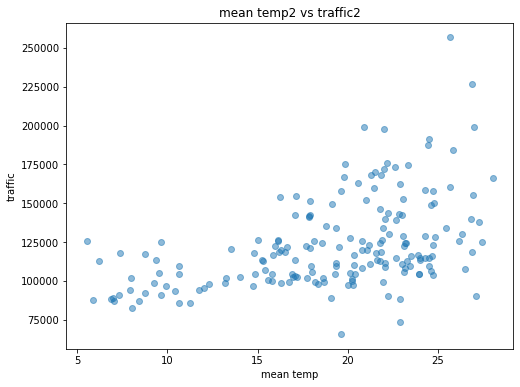

In [230]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_weather2['mean'], Data_tollgate2['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('mean temp2 vs traffic2') 
plt.xlabel('mean temp') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

#### 매출 vs. 교통량

In [231]:
# 상관계수 분석 (consumption vs. traffic) _numpy 
corr_consume2 = np.corrcoef(Data_consume2['총소비'], Data_tollgate2['1,2,3,6jong'])
print(corr_consume2)

[[1.         0.85938704]
 [0.85938704 1.        ]]


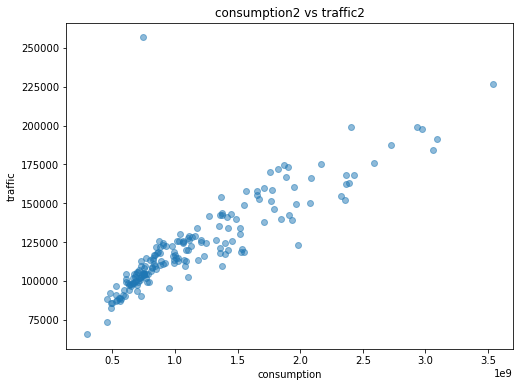

In [232]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_consume2['총소비'], Data_tollgate2['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('consumption2 vs traffic2') 
plt.xlabel('consumption') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

## + 기온 vs. 소비 상관관계 분석

#### 2,3분기

In [233]:
# 상관계수 분석 (consumption vs. mean temp) _numpy 
corr_plus2 = np.corrcoef(Data_consume2['총소비'], Data_weather2['mean'])
print(corr_plus2)

[[1.         0.40008143]
 [0.40008143 1.        ]]


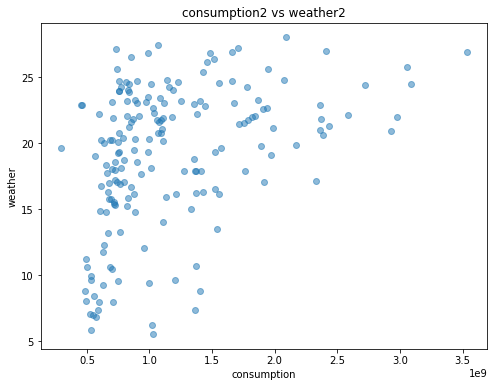

In [234]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_consume2['총소비'], Data_weather2['mean'], alpha=0.5)

# title, x,y label 정하기
plt.title('consumption2 vs weather2') 
plt.xlabel('consumption') 
plt.ylabel('weather')

# 차트 보여주기
plt.show()

#### 전체

In [235]:
# 상관계수 분석 (consumption vs. mean temp) _numpy 
corr_plus = np.corrcoef(Data_consume['총소비'], Data_weather['mean'])
print(corr_plus)

[[1.         0.49081072]
 [0.49081072 1.        ]]


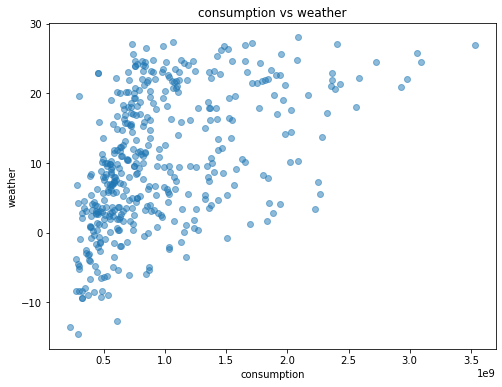

In [236]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_consume['총소비'], Data_weather['mean'], alpha=0.5)

# title, x,y label 정하기
plt.title('consumption vs weather') 
plt.xlabel('consumption') 
plt.ylabel('weather')

# 차트 보여주기
plt.show()

## 코로나 확진자 전처리

In [239]:
rawData_corona = pd.read_csv('corona.csv', encoding='CP949', engine='python')

rawData_corona

,date,province,new_confirmed
0,2020-01-20,Seoul,0
1,2020-01-20,Busan,0
2,2020-01-20,Daegu,0
3,2020-01-20,Incheon,0
4,2020-01-20,Gwangju,0
...,...,...,...
7424,2021-03-31,Daegu,15
7425,2021-03-31,Busan,58
7426,2021-03-31,Seoul,154
7427,2021-03-31,Gyeonggi-do,111


In [241]:
rawData_corona = rawData_corona[rawData_corona['province'].isin(['Gangwon-do'])]

rawData_corona

,date,province,new_confirmed
9,2020-01-20,Gangwon-do,0
26,2020-01-21,Gangwon-do,0
43,2020-01-22,Gangwon-do,0
60,2020-01-23,Gangwon-do,0
77,2020-01-24,Gangwon-do,0
...,...,...,...
7351,2021-03-27,Gangwon-do,36
7368,2021-03-28,Gangwon-do,19
7385,2021-03-29,Gangwon-do,6
7401,2021-03-30,Gangwon-do,13


In [243]:
rawData_corona = rawData_corona[rawData_corona['date'] != '2020-10-01']

rawData_corona

,date,province,new_confirmed
9,2020-01-20,Gangwon-do,0
26,2020-01-21,Gangwon-do,0
43,2020-01-22,Gangwon-do,0
60,2020-01-23,Gangwon-do,0
77,2020-01-24,Gangwon-do,0
...,...,...,...
7351,2021-03-27,Gangwon-do,36
7368,2021-03-28,Gangwon-do,19
7385,2021-03-29,Gangwon-do,6
7401,2021-03-30,Gangwon-do,13


In [245]:
Data_corona = rawData_corona.reset_index()

Data_corona.drop(columns=['index'], inplace=True)

Data_corona

,date,province,new_confirmed
0,2020-01-20,Gangwon-do,0
1,2020-01-21,Gangwon-do,0
2,2020-01-22,Gangwon-do,0
3,2020-01-23,Gangwon-do,0
4,2020-01-24,Gangwon-do,0
...,...,...,...
431,2021-03-27,Gangwon-do,36
432,2021-03-28,Gangwon-do,19
433,2021-03-29,Gangwon-do,6
434,2021-03-30,Gangwon-do,13


## 코로나 확진자 vs. 교통량 상관 분석

#### 전체

In [246]:
# 상관계수 분석 (corona vs. traffic) _numpy 
corr_coronatraffic = np.corrcoef(Data_corona['new_confirmed'], Data_tollgate['1,2,3,6jong'])
print(corr_coronatraffic)

[[ 1.        -0.1864895]
 [-0.1864895  1.       ]]


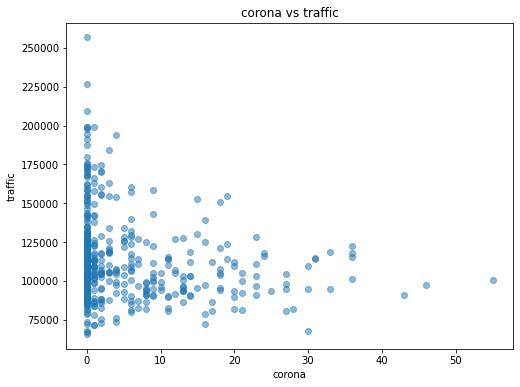

In [247]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_corona['new_confirmed'], Data_tollgate['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('corona vs traffic') 
plt.xlabel('corona') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

#### 2,3분기

In [249]:
Data_corona2 = Data_corona[72:255]

Data_corona2 = Data_corona2.reset_index()
Data_corona2.drop(columns=['index'], inplace=True)

Data_corona2

,date,province,new_confirmed
0,2020-04-01,Gangwon-do,2
1,2020-04-02,Gangwon-do,1
2,2020-04-03,Gangwon-do,2
3,2020-04-04,Gangwon-do,1
4,2020-04-05,Gangwon-do,3
...,...,...,...
178,2020-09-26,Gangwon-do,0
179,2020-09-27,Gangwon-do,0
180,2020-09-28,Gangwon-do,1
181,2020-09-29,Gangwon-do,0


In [250]:
# 상관계수 분석 (corona2 vs. traffic2) _numpy 
corr_coronatraffic2 = np.corrcoef(Data_corona2['new_confirmed'], Data_tollgate2['1,2,3,6jong'])
print(corr_coronatraffic2)

[[ 1.        -0.0027535]
 [-0.0027535  1.       ]]


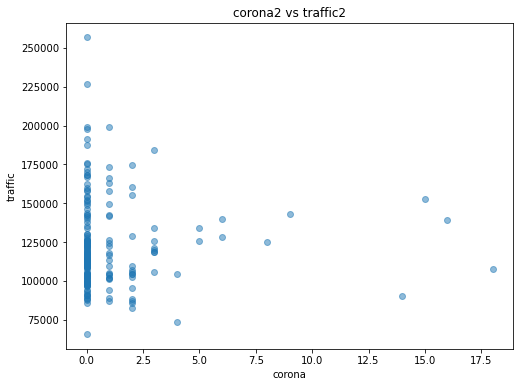

In [252]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_corona2['new_confirmed'], Data_tollgate2['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('corona2 vs traffic2') 
plt.xlabel('corona') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

## 코로나 확진자 vs. 매출 상관 분석

#### 전체

In [255]:
# 상관계수 분석 (corona vs. consume) _numpy 
corr_coronaconsume = np.corrcoef(Data_corona['new_confirmed'], Data_consume['총소비'])
print(corr_coronaconsume)

[[ 1.         -0.23227459]
 [-0.23227459  1.        ]]


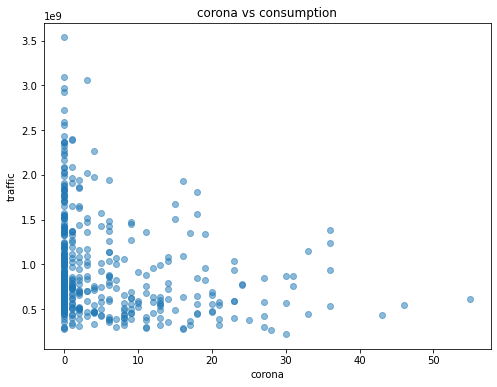

In [266]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_corona['new_confirmed'], Data_consume['총소비'], alpha=0.5)

# title, x,y label 정하기
plt.title('corona vs consumption') 
plt.xlabel('corona') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

#### 2,3분기

In [267]:
# 상관계수 분석 (corona2 vs. consume2) _numpy 
corr_coronaconsume2 = np.corrcoef(Data_corona2['new_confirmed'], Data_consume2['총소비'])
print(corr_coronaconsume2)

[[1.         0.01911725]
 [0.01911725 1.        ]]


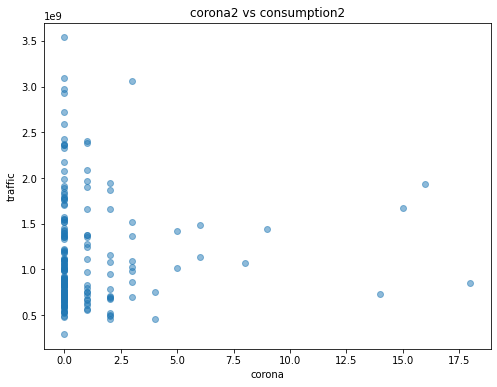

In [268]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_corona2['new_confirmed'], Data_consume2['총소비'], alpha=0.5)

# title, x,y label 정하기
plt.title('corona2 vs consumption2') 
plt.xlabel('corona') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

# 2020-4, 2021-1분기 데이터 전처리

In [269]:
Data_consume[Data_consume['date'] == 20201002]

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
255,20201002,Gangwon-do,2563352295,262189132,297672595,26191400,188302894,1774821454


In [270]:
Data_consume[Data_consume['date'] == 20210331]

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
435,20210331,Gangwon-do,640544849,18017531,173145780,1218350,42381333,405478355


In [271]:
Data_tollgate4 = Data_tollgate[255:436]

Data_tollgate4 = Data_tollgate4.reset_index()
Data_tollgate4.drop(columns=['index'], inplace=True)

Data_tollgate4

,date,code,1jong,2jong,3jong,6jong,"1,2,3,6jong",total
0,20201002,10902,191213,1002,2028,4999,199242,199883
1,20201003,10902,171394,1318,2254,4653,179619,180551
2,20201004,10902,125024,1041,2113,3800,131978,133671
3,20201005,10902,91244,2888,3381,3745,101258,107165
4,20201006,10902,90333,3357,4054,3601,101345,108662
...,...,...,...,...,...,...,...,...
176,20210327,11085,110087,1945,2724,3425,118181,122361
177,20210328,11085,108119,925,1900,3224,114168,115306
178,20210329,11085,89921,3004,3734,3706,100365,106932
179,20210330,11085,85679,3302,3917,3563,96461,103694


In [279]:
Data_consume4 = Data_consume[255:436]

Data_consume4 = Data_consume4.reset_index()
Data_consume4.drop(columns=['index'], inplace=True)

Data_consume4

,date,province,총소비,숙박업,레저스포츠,문화서비스,쇼핑(면세점 제외),식음료
0,20201002,Gangwon-do,2563352295,262189132,297672595,26191400,188302894,1774821454
1,20201003,Gangwon-do,2026498567,227897914,315467700,20064840,135110200,1316562513
2,20201004,Gangwon-do,1053808267,100762365,249031681,5221250,91280570,604102851
3,20201005,Gangwon-do,607170871,22858885,192120280,1229160,44873357,345581089
4,20201006,Gangwon-do,647706251,26521236,196537680,1730100,42506050,379713985
...,...,...,...,...,...,...,...,...
176,20210327,Gangwon-do,1388755628,114759907,190643030,5546630,140007697,936209864
177,20210328,Gangwon-do,955619576,72347770,168775170,3986990,63742393,646663253
178,20210329,Gangwon-do,586164485,20771860,159504900,1167690,41997870,362722165
179,20210330,Gangwon-do,606361586,14337160,168886510,899100,43506040,378311476


In [280]:
Data_corona4 = Data_corona[255:436]

Data_corona4 = Data_corona4.reset_index()
Data_corona4.drop(columns=['index'], inplace=True)

Data_corona4

,date,province,new_confirmed
0,2020-10-02,Gangwon-do,0
1,2020-10-03,Gangwon-do,0
2,2020-10-04,Gangwon-do,0
3,2020-10-05,Gangwon-do,0
4,2020-10-06,Gangwon-do,0
...,...,...,...
176,2021-03-27,Gangwon-do,36
177,2021-03-28,Gangwon-do,19
178,2021-03-29,Gangwon-do,6
179,2021-03-30,Gangwon-do,13


## 2020-4,2021-1 분기 코로나 vs. 교통,소비 상관 분석

#### 코로나 vs. 교통

In [281]:
# 상관계수 분석 (corona4 vs. traffic4) _numpy 
corr_coronaconsume4 = np.corrcoef(Data_corona4['new_confirmed'], Data_tollgate4['1,2,3,6jong'])
print(corr_coronaconsume4)

[[ 1.         -0.28651446]
 [-0.28651446  1.        ]]


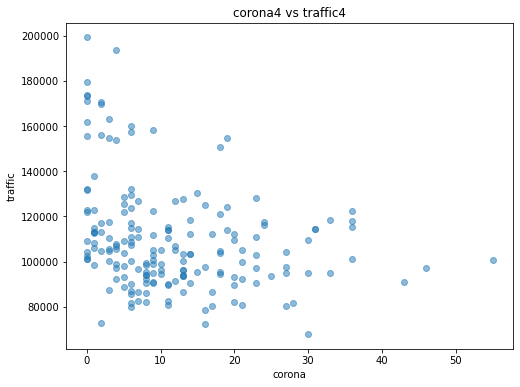

In [282]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_corona4['new_confirmed'], Data_tollgate4['1,2,3,6jong'], alpha=0.5)

# title, x,y label 정하기
plt.title('corona4 vs traffic4') 
plt.xlabel('corona') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

#### 코로나 vs. 소비

In [283]:
# 상관계수 분석 (corona4 vs. consmption4) _numpy 
corr_coronaconsume4 = np.corrcoef(Data_corona4['new_confirmed'], Data_consume4['총소비'])
print(corr_coronaconsume4)

[[ 1.         -0.24128943]
 [-0.24128943  1.        ]]


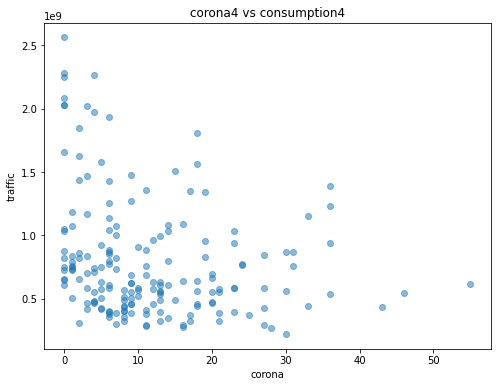

In [284]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(Data_corona4['new_confirmed'], Data_consume4['총소비'], alpha=0.5)

# title, x,y label 정하기
plt.title('corona4 vs consumption4') 
plt.xlabel('corona') 
plt.ylabel('traffic')

# 차트 보여주기
plt.show()

## 상관관계 총정리 (기온, 강수량, 교통, 소비, 코로나)

#### - 강원(전체):

    - 기온-교통:0.49
    - 교통-소비:0.89
    - 소비-기온:0.49
    - 강수량-교통:-0.0056
    - 코로나-교통:-0.19
    - 코로나-소비:-0.23

#### - 강원(2,3분기):

    - 기온-교통:0.465
    - 교통-소비:0.86
    - 소비-기온:0.40
    - 코로나-교통:-0.0027
    - 코로나-소비:-0.019
    
#### - 강원(4,1분기):

    - 코로나-교통:-0.28
    - 고로나-소비:-0.24

# 회귀 분석

## 강원 기온 and  교통 회귀 분석

In [328]:
# 전체 데이터 중 80%는 학습용, 25%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X = np.array(Data_weather['mean']).reshape(-1, 1) # X에는 독립변수 데이터셋을 넣어줌
# 독립변수(독립변수의 특성)이 지금은 1개 밖에 없더라도 각 값들은 2차원 리스트 또는 배열의 형태여야 하기 때문에 reshape을 써서 넘파이가 알아서 채워줘! 하는 것.

y = Data_tollgate['1,2,3,6jong'] # y에는 종속변수 데이터셋을 넣어줌

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [329]:
X.shape, y.shape

((436, 1), (436,))

In [299]:
from sklearn.linear_model import LinearRegression

#모델 클래스 선택 후 인스턴스 객체 생성

lr = LinearRegression()
# 매개변수가 2개가 있는데, fit_intercept, normalize가 있는데 기본값은 True, False.

In [300]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [301]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_ # 파라메터, 모델 파라메터라고 부름.

(array([1521.23233725]), 98238.4077432402)

In [302]:
#회귀식
print("y={:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

y=1521.232337X + 98238.408


In [303]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test) # 모델의 계수를 추정했으므로 predict 메소드 사용해서 예측 가능
print(np.round(y_pred,2))

[129318.35 109132.77 139498.91 114012.42 125257.83 103106.35 134666.07
  89052.5   90187.58 120846.26 135204.35 139697.84  85307.93 121548.37
 113790.08 103925.48  96202.3  125737.61  91498.18 131670.41  85530.27
  85565.37 109752.97  95312.96 105867.97 124321.69  99502.2   92282.2
 115533.65  96050.17  99431.99  99876.66 105294.59  94294.91  97173.55
  84102.65 135204.35 105727.55 136000.08 109542.33 133975.67  83997.33
 124040.85 132185.29 103551.02 105236.08 133554.4  103188.26 133051.22
 129037.51 128686.46  97384.18 123385.55 102462.75 103024.44 113649.66
 107541.33 106453.06 100216.01 114117.73  96295.91  92001.36 102767.
 113673.07 116095.34 118810.15 132079.98 100883.01 102451.05  95137.43
 133706.52 131962.96 109565.74 103714.84 127680.1  135836.25  97641.62
 123034.49 133074.63  96939.51 139101.05  98823.5  101187.26 106476.47
 124415.31  90877.98  90281.19 110490.18 108898.74  94657.66  95956.56
 138586.17  89298.24 102275.52 112889.05 110993.36 128885.39 114667.72
 133238.4

In [304]:
X_test

array([[20.43076923],
       [ 7.16153846],
       [27.12307692],
       [10.36923077],
       [17.76153846],
       [ 3.2       ],
       [23.94615385],
       [-6.03846154],
       [-5.29230769],
       [14.86153846],
       [24.3       ],
       [27.25384615],
       [-8.5       ],
       [15.32307692],
       [10.22307692],
       [ 3.73846154],
       [-1.33846154],
       [18.07692308],
       [-4.43076923],
       [21.97692308],
       [-8.35384615],
       [-8.33076923],
       [ 7.56923077],
       [-1.92307692],
       [ 5.01538462],
       [17.14615385],
       [ 0.83076923],
       [-3.91538462],
       [11.36923077],
       [-1.43846154],
       [ 0.78461538],
       [ 1.07692308],
       [ 4.63846154],
       [-2.59230769],
       [-0.7       ],
       [-9.29230769],
       [24.3       ],
       [ 4.92307692],
       [24.82307692],
       [ 7.43076923],
       [23.49230769],
       [-9.36153846],
       [16.96153846],
       [22.31538462],
       [ 3.49230769],
       [ 4

In [305]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse) # RMSE는 sklearn에 없기 때문에 np 것을 가져와서 씀

print("MSE: ", np.round(mse, 3))
print("RMSE: ", np.round(rmse, 3))

MSE:  570370310.248
RMSE:  23882.427


In [306]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print("R2: ", np.round(r2, 3))

R2:  0.184


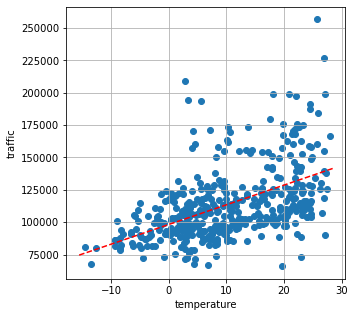

In [308]:
# 선형회귀식 시각화 (우리가 구한 식의 데이터 시각화)

plt.figure(figsize=(5,5))
xx = np.arange(Data_weather['mean'].min() - 1, Data_weather['mean'].max() + 1)
yy = reg.predict(xx.reshape(len(xx), 1))

plt.plot(xx, yy, linestyle='--', color = 'red') # 점선으로 찍을거면 -- 라인스타일

# 수집한 데이터셋 시각화 (원래 데이터)
plt.scatter(Data_weather['mean'], Data_tollgate['1,2,3,6jong']) # scatter diagram으로 그린 것

plt.title('temperature vs traffic')
plt.xlabel('temperature')
plt.ylabel('traffic')
plt.grid()
plt.show()

## 강원 매출 and  교통 회귀 분석

In [340]:
# 전체 데이터 중 80%는 학습용, 25%는 검증용으로 분리

#독립변수, 종속변수 데이터셋 준비
X = np.array(Data_consume['총소비']).reshape(-1, 1) # X에는 독립변수 데이터셋을 넣어줌
# 독립변수(독립변수의 특성)이 지금은 1개 밖에 없더라도 각 값들은 2차원 리스트 또는 배열의 형태여야 하기 때문에 reshape을 써서 넘파이가 알아서 채워줘! 하는 것.

y = Data_tollgate['1,2,3,6jong'] # y에는 종속변수 데이터셋을 넣어줌

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [341]:
X.shape, y.shape

((436, 1), (436,))

In [342]:
#모델 클래스 선택 후 인스턴스 객체 생성

lr = LinearRegression()

In [343]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [344]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_ # 파라메터, 모델 파라메터라고 부름.

(array([4.44314916e-05]), 71063.78067436565)

In [345]:
#회귀식
print("y={:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

y=0.000044X + 71063.781


In [346]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test) # 모델의 계수를 추정했으므로 predict 메소드 사용해서 예측 가능
print(np.round(y_pred,2))

[ 90876.98 153002.17 105059.09  89176.64 161104.13  95787.71 136380.18
 111946.11 117437.06 152387.56  99205.37 121799.12 102317.31 110202.64
 175887.26 138605.47 116795.71 101568.51 135346.56 104312.3   96195.66
 154626.83 133394.58 104867.59  98249.66 108293.79  93555.46  91404.82
 118168.94 103328.55  90375.33  99704.04  96637.34 109090.59 132000.26
 186026.91 120612.42 110451.73  97205.11 114930.74 104968.32 157188.19
 119014.47 101063.16  95640.24 106490.91 119459.65 206942.5   98122.85
  95513.02 100237.51  93705.63 104942.98  93230.8   99308.62 111173.41
 134388.6   97107.94 115003.22 146964.82  93441.98  89086.    96140.89
 163802.11 169816.59  88395.9  174512.    89292.8  102738.29 109540.3
 114413.89  87033.67  88199.06  94140.13  95574.14 115572.26  96483.
 163922.89 144697.88  99199.82 112184.42 115147.64 171020.58 140015.18
  85353.39 124763.22 113523.38 149071.45]


In [347]:
#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse) # RMSE는 sklearn에 없기 때문에 np 것을 가져와서 씀

print("MSE: ", np.round(mse, 3))
print("RMSE: ", np.round(rmse, 3))

MSE:  138421177.803
RMSE:  11765.253


In [348]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print("R2: ", np.round(r2, 3))

R2:  0.825


In [349]:
# 선형회귀식 시각화 (우리가 구한 식의 데이터 시각화)

plt.figure(figsize=(5,5))
xx = np.arange(Data_consume['총소비'].min() - 1, Data_consume['총소비'].max() + 1)
yy = reg.predict(xx.reshape(len(xx), 1))

plt.plot(xx, yy, linestyle='--', color = 'red') # 점선으로 찍을거면 -- 라인스타일

# 수집한 데이터셋 시각화 (원래 데이터)
plt.scatter(Data_consume['총소비'], Data_tollgate['1,2,3,6jong']) # scatter diagram으로 그린 것

plt.title('consumption vs traffic')
plt.xlabel('consumption')
plt.ylabel('traffic')
plt.grid()
plt.show() # 메모리 오류

MemoryError: Unable to allocate 24.7 GiB for an array with shape (3313777771,) and data type int64

<Figure size 360x360 with 0 Axes>

## 강원 코로나 확진자 and  교통 회귀 분석

In [350]:
# 전체 데이터 중 80%는 학습용, 25%는 검증용으로 분리

#독립변수, 종속변수 데이터셋 준비
X = np.array(Data_corona['new_confirmed']).reshape(-1, 1) # X에는 독립변수 데이터셋을 넣어줌
# 독립변수(독립변수의 특성)이 지금은 1개 밖에 없더라도 각 값들은 2차원 리스트 또는 배열의 형태여야 하기 때문에 reshape을 써서 넘파이가 알아서 채워줘! 하는 것.

y = Data_tollgate['1,2,3,6jong'] # y에는 종속변수 데이터셋을 넣어줌

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [351]:
#모델 클래스 선택 후 인스턴스 객체 생성

lr = LinearRegression()

In [352]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [353]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_ # 파라메터, 모델 파라메터라고 부름.

(array([-531.81741146]), 115050.16492588789)

In [354]:
#회귀식
print("y={:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

y=-531.817411X + 115050.165


In [355]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test) # 모델의 계수를 추정했으므로 predict 메소드 사용해서 예측 가능
print(np.round(y_pred,2))

[ 97500.19 115050.16 115050.16 111859.26 115050.16 104413.82 113454.71
 115050.16 111859.26 115050.16 115050.16 111859.26 113454.71 115050.16
 115050.16 113454.71 114518.35 110263.81 110263.81 114518.35 108136.54
 115050.16 115050.16  98563.83 111859.26 113454.71 115050.16 105477.45
 115050.16 115050.16 110795.63 105477.45 108668.36 115050.16 115050.16
 115050.16 115050.16 109200.17 115050.16 115050.16 109200.17 111859.26
 107604.72 114518.35 115050.16 114518.35 106541.09 113454.71 115050.16
 103882.   115050.16 114518.35 114518.35 113986.53 112391.08 115050.16
 112391.08 111859.26 113454.71 115050.16 114518.35 110795.63 114518.35
 115050.16 115050.16 103882.   115050.16 109200.17 113986.53 113454.71
 114518.35 110795.63 110263.81 114518.35 112922.9  111327.44 110795.63
 114518.35 114518.35 115050.16 115050.16 115050.16 115050.16 115050.16
 106009.27 115050.16 104945.63 115050.16 115050.16 113986.53 110795.63
 115050.16  85800.21 115050.16 115050.16 115050.16 102818.36  99095.64
 11505

In [356]:
#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse) # RMSE는 sklearn에 없기 때문에 np 것을 가져와서 씀

print("MSE: ", np.round(mse, 3))
print("RMSE: ", np.round(rmse, 3))

MSE:  741042936.145
RMSE:  27222.104


In [357]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print("R2: ", np.round(r2, 3))

R2:  0.019


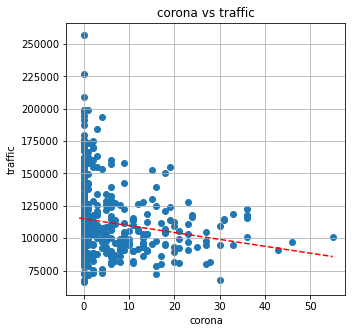

In [359]:
# 선형회귀식 시각화 (우리가 구한 식의 데이터 시각화)

plt.figure(figsize=(5,5))
xx = np.arange(Data_corona['new_confirmed'].min() - 1, Data_corona['new_confirmed'].max() + 1)
yy = reg.predict(xx.reshape(len(xx), 1))

plt.plot(xx, yy, linestyle='--', color = 'red') # 점선으로 찍을거면 -- 라인스타일

# 수집한 데이터셋 시각화 (원래 데이터)
plt.scatter(Data_corona['new_confirmed'], Data_tollgate['1,2,3,6jong']) # scatter diagram으로 그린 것

plt.title('corona vs traffic')
plt.xlabel('corona')
plt.ylabel('traffic')
plt.grid()
plt.show()

## 연습용

In [69]:
#len(Data_weather['date'][0])
Data_weather['date'][0][:4] + Data_weather['date'][0][5:7] + Data_weather['date'][0][8:]

'20200120'

In [71]:
'''
for num in range(436):
    Data_weather['date'] = (Data_weather['date'][num][:4] + Data_weather['date'][num][5:7] + Data_weather['date'][num][8:])
    
Data_weather
'''

"\nfor num in range(436):\n    Data_weather['date'] = (Data_weather['date'][num][:4] + Data_weather['date'][num][5:7] + Data_weather['date'][num][8:])\n    \nData_weather\n"

In [30]:
#Data_weather[Data_weather != '2020-10-01']
# rawData_consume[rawData_consume['date'] == '20201001']
# Data_tollgate[Data_tollgate['date'] == '20201001']

KeyError: 'date'